# Домашнее задание 2 (5 баллов).

*Все задания ниже имеют равный вес (5/10)*

Код для импорта мы написали за вас (не благодарите, нам не трудно). Дальше код будете писать вы. 

[Тут](https://habr.com/ru/companies/ruvds/articles/494720/) шпора по pandas. За основу домашнего задания взят ноутбук [отсюда](https://rutube.ru/video/f884aa6ed5f94120b7304506042fe5bb/) (не подглядывайте!).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_style('darkgrid')

#### Описание данных

Автор д/з - плохой человек, который не стал переводить описание с мотивировкой, что весь DS на английском. Так что описание полей будет на английском:

1. Account ID
- Description: A unique identifier for each social media account in the dataset.
- Type: Integer
- Example: 1, 2, 3, …
2. Username
- Description: The username or handle of the social media account.
- Type: String
- Example: john_doe, tech_guru_22, fitness_freak
3. Platform
- Description: The social media platform the account is using (Instagram, Twitter, Facebook, TikTok, LinkedIn).
- Type: Categorical (String)
- Example: Instagram, Twitter, Facebook, TikTok, LinkedIn
4. Follower Count
- Description: The total number of followers the account has.
- Type: Integer
- Example: 1500, 245000, 78000
5. Posts Per Week
- Description: The average number of posts the account creates per week.
- Type: Integer
- Example: 3, 5, 7
6. Engagement Rate
- Description: The percentage of interactions (likes, comments, shares) relative to the follower count. This is a measure of how engaging the content is.
- Type: Float
- Range: 0.01 to 0.15
- Example: 0.045 (4.5% engagement rate)
7. Ad Spend (USD)
- Description: The monthly amount spent on advertising or promoting posts.
- Type: Float
- Example: 150.75, 850.00, 300.50
8. Conversion Rate
- Description: The percentage of users who take a desired action (e.g., clicking a link, signing up, etc.) after interacting with an ad.
- Type: Float
- Range: 0.01 to 0.05 (1% to 5% conversion rate)
- Example: 0.025 (2.5% conversion rate)
9. Campaign Reach
- Description: The total number of unique users reached by the user’s campaigns in a given month.
- Type: Integer
- Example: 5000, 20000, 15000

#### Задание 0

Подгрузите данные. Да-да, за чтение таблицы баллов не будет))

**Hint**: [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [ ]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

Account ID       Username   Platform  Follower Count  Posts Per Week  \
0           1     harrislisa     TikTok           54217               3   
1           2         rhicks   LinkedIn          987518               5   
2           3        qthomas   Facebook          218870               3   
3           4     carlosholt  Instagram          207432               6   
4           5  parsonsashley   Facebook          350204               2   

   Engagement Rate  Ad Spend (USD)  Conversion Rate  Campaign Reach  
0           0.0986          538.10           0.0490            1308  
1           0.0834          479.24           0.0174           13302  
2           0.1020          150.36           0.0318           11043  
3           0.0834          932.62           0.0400           12074  
4           0.0642          504.44           0.0463           14083

#### Задание 1

Колонка `Platform` содержит название различных платформ. Давайте представим, что в них есть некоторое отношение порядка. Закодируйте каждую платформу целым числом (от 0 до N) и положите этот "код" в новую колонку `Platform_Code`. Теперь вычислите корреляцию Спирмена между всеми парами колонок в датасете (результатом будет таблица корреляций). В качестве ответа выведите значение корреляции `Platform_Code` с `Engagement Rate`. Можете после вывода числа еще коротко написать, что оно означает (нет, это не оценивается).

**Hint**: [pd.factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html), [pd.DataFrame.select_dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html), [pd.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).

In [6]:
df['Platform_Code'] = pd.factorize(df['Platform'])[0]

In [7]:
df.corr(numeric_only=True)

Account ID  Follower Count  Posts Per Week  Engagement Rate  \
Account ID         1.000000        0.002798       -0.003073         0.003597   
Follower Count     0.002798        1.000000       -0.004849        -0.016900   
Posts Per Week    -0.003073       -0.004849        1.000000         0.016579   
Engagement Rate    0.003597       -0.016900        0.016579         1.000000   
Ad Spend (USD)    -0.004701       -0.004547       -0.001239         0.006761   
Conversion Rate    0.004754        0.013582       -0.010926        -0.004407   
Campaign Reach    -0.006911       -0.020842        0.003451         0.010460   
Platform_Code     -0.005210        0.010398       -0.011417         0.034702   

                 Ad Spend (USD)  Conversion Rate  Campaign Reach  \
Account ID            -0.004701         0.004754       -0.006911   
Follower Count        -0.004547         0.013582       -0.020842   
Posts Per Week        -0.001239        -0.010926        0.003451   
Engagement Rate        0.006761        -0.004407        0.010460   
Ad Spend (USD)         1.000000         0.011880        0.011333   
Conversion Rate        0.011880         1.000000       -0.008496   
Campaign Reach         0.011333        -0.008496        1.000000   
Platform_Code         -0.015472         0.007539        0.011957   

                 Platform_Code  
Account ID           -0.005210  
Follower Count        0.010398  
Posts Per Week       -0.011417  
Engagement Rate       0.034702  
Ad Spend (USD)       -0.015472  
Conversion Rate       0.007539  
Campaign Reach        0.011957  
Platform_Code         1.000000

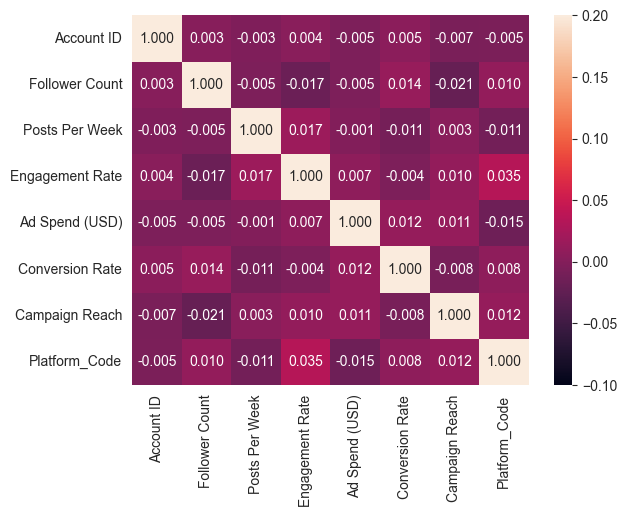

In [8]:
sns.heatmap(data=df.select_dtypes(exclude='object').corr(), annot=True, fmt='.3f', vmin=-0.1, vmax=0.2)
plt.show()

**ОТВЕТ**: корреляция между этими признаками составит 0.035. Ниче она не означает, околонулевое значение между категориальной и непрерывной переменной...

#### Задание 2

Теперь посмотрите на столбец `Follower Count`. В нем какие-то числа. Иногда бывает полезно провести дискретизацию такого признака. Разбейте все значения в столбце на 4 группы: "Low", "Medium", "High", "Very High". Каждая группа включает в себя новые 25% данных. То есть, Low включает в себя 25% самых маленьких значений признака и так далее. Положите значения "Low", "Medium", "High" или "Very High" для каждого сэмпла датасета в новую колонку `Follower_Bin`. Теперь посчитайте среднее значение `Engagement Rate` для каждой категории из `Follower_Bin`. В качестве ответа выведите значение для категории "High".

**Hint**: [pd.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html), [pd.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), [pd.DataFrame.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)

In [9]:
df['Follower Count'].to_frame().sample(10) # посмотрел на столбец :)

Follower Count
5114          542388
4199          734195
9528          882479
8749          245114
9409          214716
9084          840899
9689          428515
5831          375994
5021          492305
7999          353670

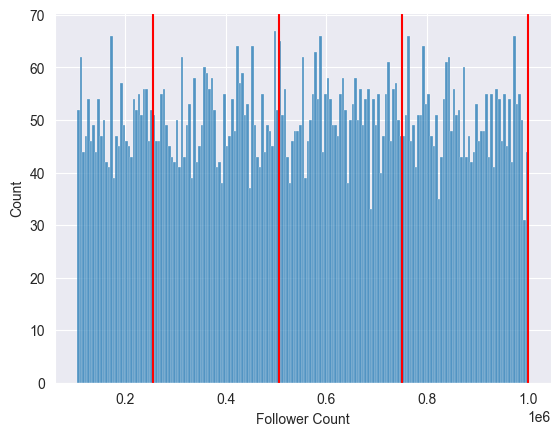

In [10]:
sns.histplot(data=df, x='Follower Count', binrange=(df['Follower Count'].quantile(0.1), df['Follower Count'].quantile(1)), binwidth=5000)


massive = [0.25, 0.5, 0.75, 1]

for i in range(4):
    plt.axvline(df['Follower Count'].quantile(massive[i]), color='red', linewidth=1.5)
plt.show()

# просто что-то порисовал

In [11]:
df['Follower_Bin'] = pd.qcut(df['Follower Count'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

In [12]:
df.sample(5)

Account ID       Username   Platform  Follower Count  Posts Per Week  \
3036        3037  jeffreymcneil     TikTok          722149               6   
6321        6322   robertpalmer    Twitter           99061               5   
1174        1175      toddbryan     TikTok           44845               1   
2605        2606        blake06   Facebook          356218               5   
8464        8465  michelleriggs  Instagram          730479               1   

      Engagement Rate  Ad Spend (USD)  Conversion Rate  Campaign Reach  \
3036           0.0856          947.76           0.0244           11255   
6321           0.0856          254.87           0.0307            7748   
1174           0.0986          846.82           0.0238           36597   
2605           0.0856          264.42           0.0342           19480   
8464           0.0834          959.49           0.0273           27225   

      Platform_Code Follower_Bin  
3036              0         High  
6321              4          Low  
1174              0          Low  
2605              2       Medium  
8464              3         High

In [13]:
df.groupby('Follower_Bin', observed=False)['Engagement Rate'].mean().to_frame()

Engagement Rate
Follower_Bin                 
Low                  0.087032
Medium               0.086858
High                 0.086550
Very High            0.086505

**ОТВЕТ**: $0.08655$

#### Задание 3

Иногда бывает полезно превратить широкую таблицу в длинную (например, для визуализаций сразу нескольких признаков на одной картинке). Да, звучит странно, но именно этим вы сейчас и займетесь. Сделайте новый датафрейм `melted_df`, в который вы поместите каждый сэмпл датасета 6 раз: по одному разу на значение из 'Follower Count', 'Posts Per Week', 'Ad Spend (USD)', 'Conversion Rate', 'Engagement Rate' и 'Campaign Reach'. То есть, вы берете сэмпл из датасета (строку) и превращаете ее в 6 отдельных строк. Каждая отдельная строка в столбце `Metric` имеет имя из предложенного списка 5 признаков, а в столбце `Value` - значение данного сэмпла по этому признаку. Значение `Platform` повторяется в этих 6 строках.

Иначе говоря, 

```json
{
    "Account ID": 1,
    "Username": "harrislisa",
    "Platform": "TikTok",
    "Follower Count": 54217,
    "Posts Per Week": 3,
    "Engagement Rate": 0.0986,
    "Ad Spend (USD)": 538.1,
    "Conversion Rate": 0.049,
    "Campaign Reach": 1308,
    "Platform_Code": 0,
    "Follower_Bin": "Low"
}
```

превращается в 

```json
{
    "Platform": "TikTok",
    "Metric": "Follower Count",
    "Value": 54217,
},
{
    "Platform": "TikTok",
    "Metric": "Posts Per Week",
    "Value": 3,
}, ...
```

Для каждого уникальной пары значений (`Platform`, `Metric`) посчитайте моду среди всех значений `Value` для этой пары, результат сделайте списком и оставьте только наибольшее. В качестве ответа выведите сумму полученных мод (сумму всех значений в столбце `Value` уже после вычисления мод). Иначе говоря, выведите сумму всех мод значений для всех уникальных пар (`Platform`, `Metric`).

**Hint**: [pd.melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html), [pd.DataFrame.mode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html), [pd.DataFrameGroupBy.agg](https://pandas.pydata.org/docs/dev/reference/api/pandas.core.groupby.DataFrameGroupBy.agg.html)

In [52]:
melted_df = df.melt(id_vars = 'Platform', value_vars=['Follower Count', 'Posts Per Week', 'Ad Spend (USD)', 'Conversion Rate', 'Engagement Rate', 'Campaign Reach'], var_name='Metric')

In [79]:
df_group_melt = melted_df.groupby(by=['Platform', 'Metric'])['value'].apply(lambda x: x.mode()).to_frame().reset_index().drop(columns=['level_2'])
df_group_melt

Platform           Metric        value
0     Facebook   Ad Spend (USD)     421.5600
1     Facebook   Campaign Reach    4022.0000
2     Facebook   Campaign Reach    4356.0000
3     Facebook   Campaign Reach    4553.0000
4     Facebook   Campaign Reach    4728.0000
...        ...              ...          ...
2145   Twitter  Conversion Rate       0.0283
2146   Twitter  Engagement Rate       0.1020
2147   Twitter   Follower Count  658164.0000
2148   Twitter   Follower Count  744125.0000
2149   Twitter   Posts Per Week       5.0000

[2150 rows x 3 columns]

In [82]:
max_mode = df_group_melt.groupby(by=['Platform', 'Metric'])['value'].max().to_frame()
max_mode

value
Platform  Metric                      
Facebook  Ad Spend (USD)      421.5600
          Campaign Reach    49860.0000
          Conversion Rate       0.0186
          Engagement Rate       0.0856
          Follower Count   350858.0000
          Posts Per Week        5.0000
Instagram Ad Spend (USD)      878.6800
          Campaign Reach    48629.0000
          Conversion Rate       0.0274
          Engagement Rate       0.0986
          Follower Count   999726.0000
          Posts Per Week        5.0000
LinkedIn  Ad Spend (USD)      783.6000
          Campaign Reach    14912.0000
          Conversion Rate       0.0186
          Engagement Rate       0.0642
          Follower Count    92848.0000
          Posts Per Week        6.0000
TikTok    Ad Spend (USD)      951.6500
          Campaign Reach    48053.0000
          Conversion Rate       0.0227
          Engagement Rate       0.0856
          Follower Count   700758.0000
          Posts Per Week        6.0000
Twitter   Ad Spend (USD)      696.4300
          Campaign Reach    46757.0000
          Conversion Rate       0.0283
          Engagement Rate       0.1020
          Follower Count   744125.0000
          Posts Per Week        5.0000

In [84]:
round(max_mode['value'].sum(), 2)

np.float64(3100285.47)

**ОТВЕТ** $3100285.47$

#### Задание 4

А теперь хочется посмотреть на самые популярные аккаунты на разных платформах. Для каждой платформы отсортируйте датафрейм по убыванию количества подписчиков (`Follower Count`) - да, без циклов, сразу для всех платформ сделать сортировку, а затем оставьте только первые три записи для каждой платформы - это и будут три самых популярных аккаунта для каждой платформы. В качестве ответа выведите саму таблицу и минимальное значение `Follower Count` в ней.

**Hint**: к *groupby* можно применять функции - это эквивалентно применению функции к каждой "группе" внутри groupby-объекта. Читайте [про применение apply к датафрейму после groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#flexible-apply).

In [16]:
answer_table = df.sort_values(by=['Platform', 'Follower Count'], ascending=False).groupby('Platform').head(3)

In [17]:
answer_table

Account ID         Username   Platform  Follower Count  Posts Per Week  \
4920        4921      teresaellis    Twitter          999919               6   
9684        9685           sriley    Twitter          999442               3   
7576        7577       peggymunoz    Twitter          998216               6   
5838        5839     edwardthomas     TikTok          999739               7   
4234        4235    andradewesley     TikTok          999234               5   
2575        2576     williamwyatt     TikTok          998623               6   
3039        3040          toneill   LinkedIn          999055               4   
6359        6360    andrewgregory   LinkedIn          998968               7   
2159        2160     ashleycooper   LinkedIn          998925               6   
8685        8686  alexandersamuel  Instagram          999726               3   
3965        3966         lrodgers  Instagram          999351               1   
2189        2190           jbrown  Instagram          997844               5   
2403        2404           eric65   Facebook          999982               6   
7350        7351     patricknoble   Facebook          997915               3   
1689        1690      chavezjason   Facebook          997512               7   

      Engagement Rate  Ad Spend (USD)  Conversion Rate  Campaign Reach  \
4920           0.0834          411.63           0.0460            3975   
9684           0.0834          206.84           0.0225           12783   
7576           0.0642          456.61           0.0456           22037   
5838           0.0642          630.77           0.0325           35523   
4234           0.0834          872.77           0.0481           17188   
2575           0.0856          477.98           0.0250           43299   
3039           0.0642          799.49           0.0174           21862   
6359           0.1020          797.64           0.0351           15552   
2159           0.0856          474.46           0.0156           45956   
8685           0.0834          687.61           0.0205           11050   
3965           0.0834          565.07           0.0335           12391   
2189           0.0642          505.61           0.0202           14717   
2403           0.0642          884.06           0.0281           17312   
7350           0.0834          429.01           0.0182           25985   
1689           0.0834          993.20           0.0397           45717   

      Platform_Code Follower_Bin  
4920              4    Very High  
9684              4    Very High  
7576              4    Very High  
5838              0    Very High  
4234              0    Very High  
2575              0    Very High  
3039              1    Very High  
6359              1    Very High  
2159              1    Very High  
8685              3    Very High  
3965              3    Very High  
2189              3    Very High  
2403              2    Very High  
7350              2    Very High  
1689              2    Very High

In [18]:
display(answer_table['Follower Count'].min())

np.int64(997512)

#### Задание 5

Хочется посчитать какую-то метрику. Мы хотим посмотреть, на отношение разности суммы подписчиков аккаунтов с высокой и низкой конверсией к суммарному охвату рекламы на каждой платформе. То есть, мы делим аккаунты на две группы: высокая и низка конверсия. Затем мы смотрим на то, на сколько сильно влияние аккаунтов с высокой конверсией по сравнению с аккаунтами с низкой конверсией. 

Давайте определим *Conversion Influence* следущим образом:

$$Conversion Influence = \frac{Total Follower\ Count (High) - Total Follower\ Count (Low)}{Total Campaign Reach (High)+Total Campaign Reach (Low)}$$

Считать эту метрику мы будет для каждой `Platform`. В этой формуле High - это значения всех сэмплов датасета, в которых `Conversion Rate` больше медианы, а `Low` - не более медианы. `Total Feature` - это суммарное количество значений `Feature` либо по `High` сэмплам, либо по `Low`.

Чтобы постоянно не пересчитывать, где High. где Low, сделайте новую колонку в датасете `Conversion_Category`. Положите в нее для каждой строки либо High, либо Low.

Выведите платформу с самым большим `Conversion Influence`.

**Hint**: данное задание не про *groupby*, а скорее про [pd.pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html). Сделайте сводную таблицу, по которой уже можно посчитать суммы, а затем подставить их в формулы.

In [19]:
df.sample(5)

Account ID         Username   Platform  Follower Count  Posts Per Week  \
4950        4951   henrydominique   Facebook           77753               6   
1725        1726  anthonyanderson   Facebook          743414               4   
1797        1798       davidsmith     TikTok          130089               2   
513          514      kellidaniel     TikTok          421922               1   
286          287        vanessa81  Instagram          891869               3   

      Engagement Rate  Ad Spend (USD)  Conversion Rate  Campaign Reach  \
4950           0.1020          802.17           0.0189           35081   
1725           0.0856          254.87           0.0200            3863   
1797           0.1020          764.67           0.0200           29249   
513            0.0834          618.92           0.0418           37911   
286            0.0856          852.45           0.0381           10116   

      Platform_Code Follower_Bin  
4950              2          Low  
1725              2         High  
1797              0          Low  
513               0       Medium  
286               3    Very High

In [20]:
df['Conversion_Category'] = df['Conversion Rate'].apply(lambda x: 'High' if x > df['Conversion Rate'].median() else 'Low')

In [21]:
df_pivo = df.pivot_table(index='Platform', columns='Conversion_Category', values=['Follower Count', 'Campaign Reach'], aggfunc='sum')

In [22]:
df_pivo

Campaign Reach           Follower Count           
Conversion_Category           High       Low           High        Low
Platform                                                              
Facebook                  26096572  25635749      512439819  499712373
Instagram                 24250993  26482804      487970573  524726855
LinkedIn                  25186827  25147594      509450797  499766430
TikTok                    24253556  25091283      495899696  491110679
Twitter                   26376400  24566705      536955379  481382949

$$Conversion Influence = \frac{Total Follower\ Count (High) - Total Follower\ Count (Low)}{Total Campaign Reach (High)+Total Campaign Reach (Low)}$$

In [23]:
df_pivo['Conversion Influence'] = (df_pivo.loc[:, ('Follower Count', 'High')] - df_pivo.loc[:, ('Follower Count', 'Low')]) / (df_pivo.loc[:, ('Campaign Reach', 'High')] + df_pivo.loc[:, ('Campaign Reach', 'Low')])

In [24]:
df_pivo['Conversion Influence'].idxmax()

'Twitter'

**ОТВЕТ**: Twitter

#### Задание 6

Мы знаем, что вам понравилось считать метрики по формуле. Давайте закрепим этот успех. Теперь для каждой платформы посчитаем, на сколько эффективна реклама в разрезе трех последовательных записей в датасете. 

Для каждой платформы отсортируйте записи в порядке убывания `Posts Per Week`. Будто бы аккаунты, которые постят чаще, используют более "активные" стратегии по рекламе. Теперь посчитайте *скользущие суммы с окном 3* по `Campaign Reach` и `Ad Spend (USD)`. Скользящая сумма с окном N - это вы идете по массиву, берете все последовательные тройки записей и суммируете их. Для первых двух записей троек не найдется. Для них скользящее среднее - NaN, что нам не помешает. 

Теперь для каждого окна посчитайте 

$$Rolling Efficiency Ratio = \frac{Rolling Sum of Campaign Reach}{Rolling Sum of Ad Spend}$$

По сути, для каждого окна вы посчитаете сколько пользователе привлеклось за один доллар, потреченный на рекламу, в данном окне. Понятно, что значений будет столько, сколько окон. Нам интересно максимально значение такой эффективности для каждой платформы.

В качестве ответа выведите название платформы с наибольшей максимальной эффективность и наименьшей (два названия, не одно, не три, ровно два).

**Hint**: окна можно делать через [pd.DataFrame.rolling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html).

In [25]:
df.head()

Account ID       Username   Platform  Follower Count  Posts Per Week  \
0           1     harrislisa     TikTok           54217               3   
1           2         rhicks   LinkedIn          987518               5   
2           3        qthomas   Facebook          218870               3   
3           4     carlosholt  Instagram          207432               6   
4           5  parsonsashley   Facebook          350204               2   

   Engagement Rate  Ad Spend (USD)  Conversion Rate  Campaign Reach  \
0           0.0986          538.10           0.0490            1308   
1           0.0834          479.24           0.0174           13302   
2           0.1020          150.36           0.0318           11043   
3           0.0834          932.62           0.0400           12074   
4           0.0642          504.44           0.0463           14083   

   Platform_Code Follower_Bin Conversion_Category  
0              0          Low                High  
1              1    Very High                 Low  
2              2          Low                High  
3              3          Low                High  
4              2       Medium                High

In [26]:
df_rolling_AD = df.sort_values(by=['Platform', 'Posts Per Week'], ascending=[True, False]).set_index('Platform')[['Campaign Reach', 'Ad Spend (USD)']].rolling(3).sum().rename(columns={"Campaign Reach": 'Rolling Sum Of Campaign', 'Ad Spend (USD)' : 'Rolling Sum of ADSpend'})
df_rolling_AD['Rolling Efficiency Ration'] = df_rolling_AD['Rolling Sum Of Campaign'] / df_rolling_AD['Rolling Sum of ADSpend']
display(df_rolling_AD.head(10)) 

Rolling Sum Of Campaign  Rolling Sum of ADSpend  \
Platform                                                    
Facebook                      NaN                     NaN   
Facebook                      NaN                     NaN   
Facebook                  74760.0                 1259.71   
Facebook                  67506.0                 1631.14   
Facebook                  77597.0                 1300.98   
Facebook                  72474.0                 1440.20   
Facebook                  51534.0                 1498.35   
Facebook                  38259.0                 1722.31   
Facebook                  41630.0                 2045.64   
Facebook                  31612.0                 1523.81   

          Rolling Efficiency Ration  
Platform                             
Facebook                        NaN  
Facebook                        NaN  
Facebook                  59.346993  
Facebook                  41.385779  
Facebook                  59.645037  
Facebook                  50.322177  
Facebook                  34.393833  
Facebook                  22.213771  
Facebook                  20.350599  
Facebook                  20.745369

In [27]:
df_rolling_AD.reset_index().groupby('Platform')['Rolling Efficiency Ration'].agg(['max', 'min'])

max       min
Platform                       
Facebook   388.513469  6.667117
Instagram  371.822908  7.816901
LinkedIn   261.489362  2.901054
TikTok     259.209914  4.015978
Twitter    341.152664  9.657779

In [28]:
df_rolling_AD.reset_index().groupby('Platform')['Rolling Efficiency Ration'].agg(['max', 'min']).loc[:, 'max'].agg(['idxmax', 'idxmin'])

idxmax    Facebook
idxmin      TikTok
Name: max, dtype: object

**ОТВЕТ**: платформа с наибольшей максимальной - Facebook (388 человек на доллар), с наименьшей максимальной - TikTok (259 на доллар).

#### Задание 7

Это еще не все прекрасные функции pandas, которые мы хотим вам показать. Теперь вы посчитаете, сколько аккаунтов на каждой платформе одновременно лучшие по `Engagement Rate` и `Conversion Rate`.

Сделайте два отдельных суб-сета. В одном оставьте для каждой платфмормы один топовый аккаунт по `Engagement Rate`, в другом - по `Conversion Rate`. Соедините эти два подмножества по столбцу `Platform` так, что в одно строке есть описание сразу двух аккаунтов-лидеров. Теперь посмотрите равны ли имена аккаунтов в одной строке. Выведите количество строк, в которых названия аккаунтов совпадают.

In [29]:
subset_top_engagement = df.loc[df.groupby('Platform')['Engagement Rate'].idxmax()]
subset_top_conversion = df.loc[df.groupby('Platform')['Conversion Rate'].idxmax()]
merge_top_accounts = pd.merge(subset_top_engagement, subset_top_conversion, how='inner', on='Platform', suffixes=('_engagement', '_conversion'))

In [30]:
merge_top_accounts

Account ID_engagement Username_engagement   Platform  \
0                      3             qthomas   Facebook   
1                     60        jaimeedwards  Instagram   
2                     73             allen72   LinkedIn   
3                     23          carlosholt     TikTok   
4                     95       marquezedward    Twitter   

   Follower Count_engagement  Posts Per Week_engagement  \
0                     218870                          3   
1                     521857                          6   
2                     595994                          6   
3                     693593                          5   
4                     487293                          1   

   Engagement Rate_engagement  Ad Spend (USD)_engagement  \
0                       0.102                     150.36   
1                       0.102                     902.41   
2                       0.102                     933.92   
3                       0.102                     779.45   
4                       0.102                     852.45   

   Conversion Rate_engagement  Campaign Reach_engagement  \
0                      0.0318                      11043   
1                      0.0328                      46702   
2                      0.0381                      42791   
3                      0.0208                       4053   
4                      0.0310                      32055   

   Platform_Code_engagement  ... Username_conversion  \
0                         2  ...           michael55   
1                         3  ...       aprilwilliams   
2                         1  ...              jeff87   
3                         0  ...        robertmorris   
4                         4  ...           trobinson   

  Follower Count_conversion  Posts Per Week_conversion  \
0                    244081                          3   
1                    222951                          4   
2                    816658                          1   
3                    702687                          1   
4                    500601                          5   

  Engagement Rate_conversion  Ad Spend (USD)_conversion  \
0                     0.0834                     313.49   
1                     0.0986                     767.52   
2                     0.0856                     986.41   
3                     0.0856                     276.36   
4                     0.1020                     611.10   

   Conversion Rate_conversion  Campaign Reach_conversion  \
0                        0.05                      37596   
1                        0.05                      45634   
2                        0.05                      22822   
3                        0.05                       2250   
4                        0.05                      35814   

   Platform_Code_conversion  Follower_Bin_conversion  \
0                         2                      Low   
1                         3                      Low   
2                         1                Very High   
3                         0                     High   
4                         4                   Medium   

   Conversion_Category_conversion  
0                            High  
1                            High  
2                            High  
3                            High  
4                            High  

[5 rows x 23 columns]

In [31]:
merge_top_accounts[merge_top_accounts['Username_engagement'] == merge_top_accounts['Username_conversion']].shape[0]

0

**ОТВЕТ**: Имена не совпадают. Кол-во строк, где совпадают, равно $0$

#### Задание 8

Давайте теперь что-то попроще сделаем. Например, посчитаем отношение суммарного количества подписчиков на аккаунтах с высокой конверсией к такой же сумме в аккаунтах с низкой конверсией (очевидно, для каждой платформы). По сути, мы просто хотим получить число, которое характеризует, на сколько сильно аккаунты с высокой конверсией "доминируют" над аккаунтами с низкой конверсией в плане количества подписчиков.

Высокой конверсией будем считать конверсию больше средней. Остальное - низкая. Посчитайте суммы подписчиков для каждой платформы, поделите одно на другое и выведите разницу между самым большим значением и самым маленьким, а также платформы, которые соотвутствуют этим значениям.

Используйте магическую команду `%%time`, чтобы замерить, сколько времени ушло на исполнение вашего pandas-скрипта.

In [32]:
df_mean_conv = df.groupby('Platform')[['Conversion Rate']].mean().rename(columns={'Conversion Rate': 'mean_conversion'})

# посчитали средние значения конверсии по каждой платформе

Сделаю оговорку, что среднее я считаю по каждой платформе, а не относительно всего датасета, что как будто будет логичнее, т.к. потом мы сравниваем доминацию именно по платформенно

In [33]:
df_mean_conv

mean_conversion
Platform                  
Facebook          0.028878
Instagram         0.029179
LinkedIn          0.029197
TikTok            0.029290
Twitter           0.029602

In [34]:
%%time

high_conv_total = df[df['Conversion Rate'] > pd.merge(df, df_mean_conv, left_on='Platform', right_index=True)['mean_conversion']].groupby('Platform')['Follower Count'].sum()
low_conv_total = df[df['Conversion Rate'] <= pd.merge(df, df_mean_conv, left_on='Platform', right_index=True)['mean_conversion']].groupby('Platform')['Follower Count'].sum()
answer = round((high_conv_total / low_conv_total).to_frame().rename(columns={"Follower Count": "follower ratio"}), 3)
display(answer)
print(f'Разница между самым большим и самым маленьким значением - {answer.max() - answer.min()}')
print(f'Платформа с наибольшим соотношением - {answer.idxmax().iloc[0]}, платформа с наименьшим соотношением - {answer.idxmin().iloc[0]}')

follower ratio
Platform                 
Facebook            0.957
Instagram           0.865
LinkedIn            0.948
TikTok              0.958
Twitter             1.014

Разница между самым большим и самым маленьким значением - follower ratio    0.149
dtype: float64
Платформа с наибольшим соотношением - Twitter, платформа с наименьшим соотношением - Instagram
CPU times: total: 15.6 ms
Wall time: 10.7 ms


#### Задание 9

А теперь решите задание 8 чисто питоном. Никаких функций и методов pandas. Только питоновские циклы. Замерьте время выполнения кода. Наконец, сравните время в задании 8 и 9. Напишите ниже, кто же победил: чистый python и pandas?

**Hint**: Чтобы итерироваться по датафрейму, можно из него сделать генератор через [pd.DataFrame.iterrows](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html) или [pd.DataFrame.itertuples](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.itertuples.html#pandas.DataFrame.itertuples). К слову, это не все способы итерироваться по датафрейму.

In [35]:
%%time

total_dict_of_pairs = {}

for index, ser in df.iterrows():
    total_dict_of_pairs.setdefault(ser['Platform'], []).append((ser['Follower Count'], ser['Conversion Rate']))
    
# print(total_dict_of_pairs)


for platform in total_dict_of_pairs:
    mean_num = sum(map(lambda x: x[1], total_dict_of_pairs[platform])) / len(total_dict_of_pairs[platform]) # тут считается среднее значение конверсии по платформе
    low_conv = sum(map(lambda x: x[0], filter(lambda x: x[1] <= mean_num, total_dict_of_pairs[platform])))
    high_conv = sum(map(lambda x: x[0], filter(lambda x: x[1] > mean_num, total_dict_of_pairs[platform])))
    ratio = round(high_conv / low_conv, 3) 
    print(f'{platform}: средняя конверсия по платформе - {mean_num}, соотношение - {ratio}') 


TikTok: средняя конверсия по платформе - 0.029290447154471544, соотношение - 0.958
LinkedIn: средняя конверсия по платформе - 0.02919727317798711, соотношение - 0.948
Facebook: средняя конверсия по платформе - 0.028878025793650793, соотношение - 0.957
Instagram: средняя конверсия по платформе - 0.029178718077115674, соотношение - 0.865
Twitter: средняя конверсия по платформе - 0.029602247752247752, соотношение - 1.014
CPU times: total: 93.8 ms
Wall time: 164 ms


**А победителем является**: пандас (pandas). Видим, что при аналогичном результате pandas быстрее в 16 раз, да еще при использовании чистого питона проц тоже грузанулся на 80 милисекунд.

#### Задание 10

Крайне серьезное задание. Отнеситесь к нему соответствующе. В ячейке ниже напишите ваш любимый анекдот или мем (только без баянов, окей?). Можно плохие. Помните, это задание на полный балл. Проверяющий работу ассистент должен улыбнуться.

Если вставляете картинку, то убедитесь, что вы ее не подгружаете локально. А то будет неудобно - потерять балл на этом задании, когда надо было выложить картинку на облако и прокинуть ссылку. И нет, нельзя сюда просто ссылку вставить. Либо ищите, как вставить картинку, либо смешной анекдот. Есть всего два стула - выбирайте...

**АНЕКДОТ**

Идут два барана по полю, встречаются друг с другом. Один другому говорит: "беее". А этот ему отвечает: "Бл@, братан, тож самое хотел сказать, с языка снял!"

машин леарнинг такой типа:

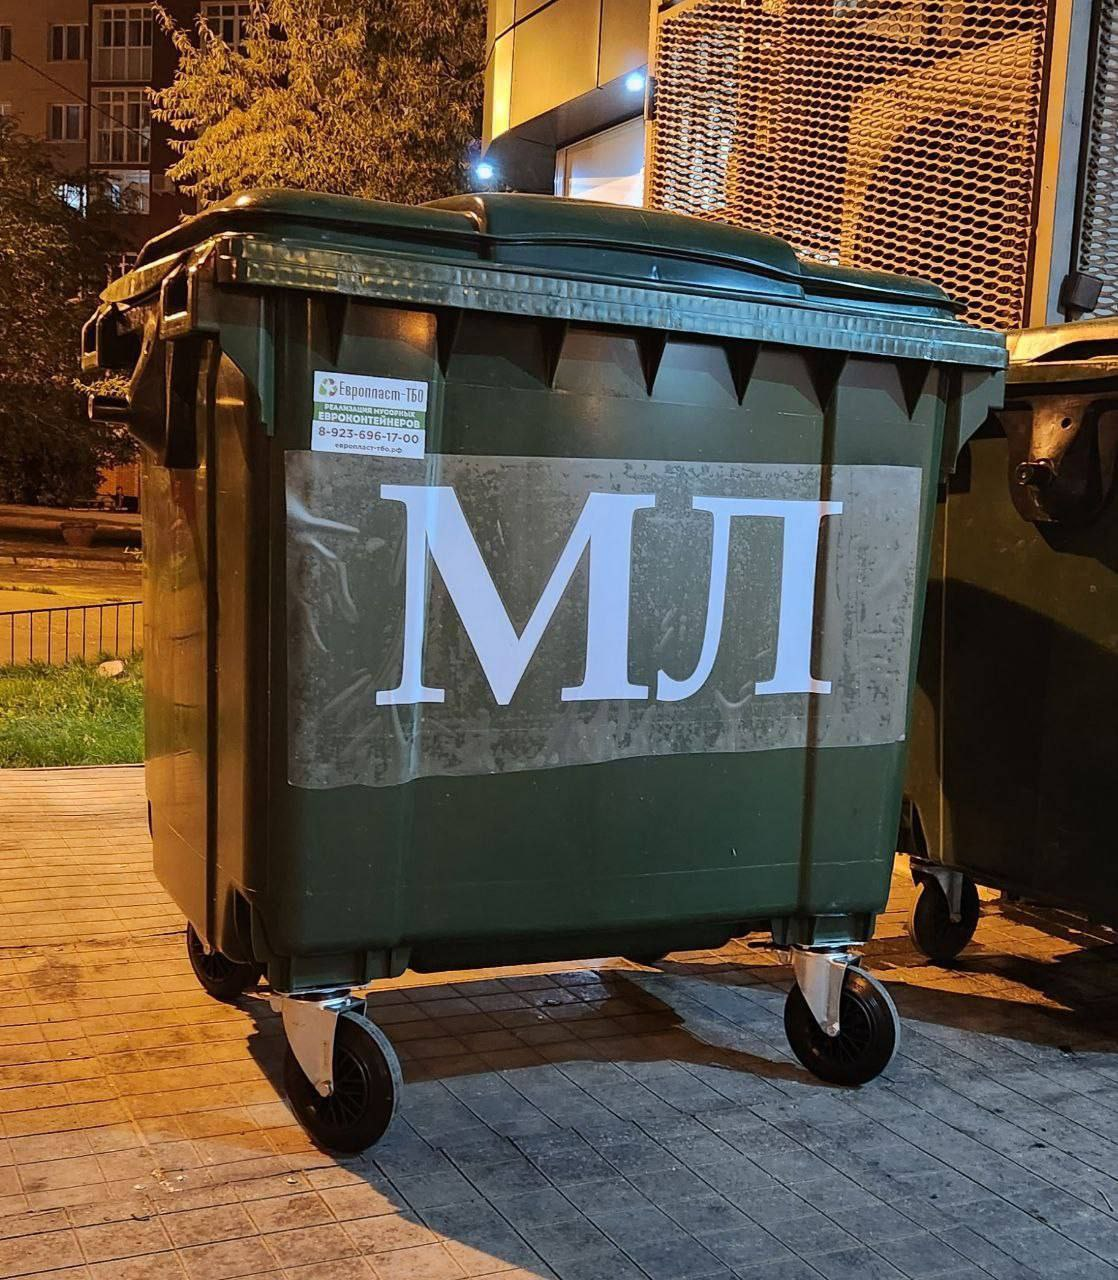